In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Cohan\Documents\שבתון צחי\Train_rev1.csv')

# Data Exploration

In [143]:
df.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244768 entries, 0 to 244767
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Title               244767 non-null  object
 1   FullDescription     244768 non-null  object
 2   LocationRaw         244768 non-null  object
 3   LocationNormalized  244768 non-null  object
 4   ContractType        65442 non-null   object
 5   ContractTime        180863 non-null  object
 6   Company             212338 non-null  object
 7   Category            244768 non-null  object
 8   SalaryRaw           244768 non-null  object
 9   SalaryNormalized    244768 non-null  int64 
 10  SourceName          244767 non-null  object
dtypes: int64(1), object(10)
memory usage: 20.5+ MB


In [ ]:
#ContractTime

In [269]:
df['ContractTime'].value_counts()

permanent    151521
contract      29342
Name: ContractTime, dtype: int64

In [ ]:
#ContractTime

In [96]:
df['ContractType'].value_counts()

full_time    57538
part_time     7904
Name: ContractType, dtype: int64

ContractType  ContractTime
full_time     contract        AxesSubplot(0.125,0.125;0.775x0.755)
              permanent       AxesSubplot(0.125,0.125;0.775x0.755)
              NaN             AxesSubplot(0.125,0.125;0.775x0.755)
part_time     contract        AxesSubplot(0.125,0.125;0.775x0.755)
              permanent       AxesSubplot(0.125,0.125;0.775x0.755)
              NaN             AxesSubplot(0.125,0.125;0.775x0.755)
NaN           contract        AxesSubplot(0.125,0.125;0.775x0.755)
              permanent       AxesSubplot(0.125,0.125;0.775x0.755)
              NaN             AxesSubplot(0.125,0.125;0.775x0.755)
Name: SalaryNormalized, dtype: object

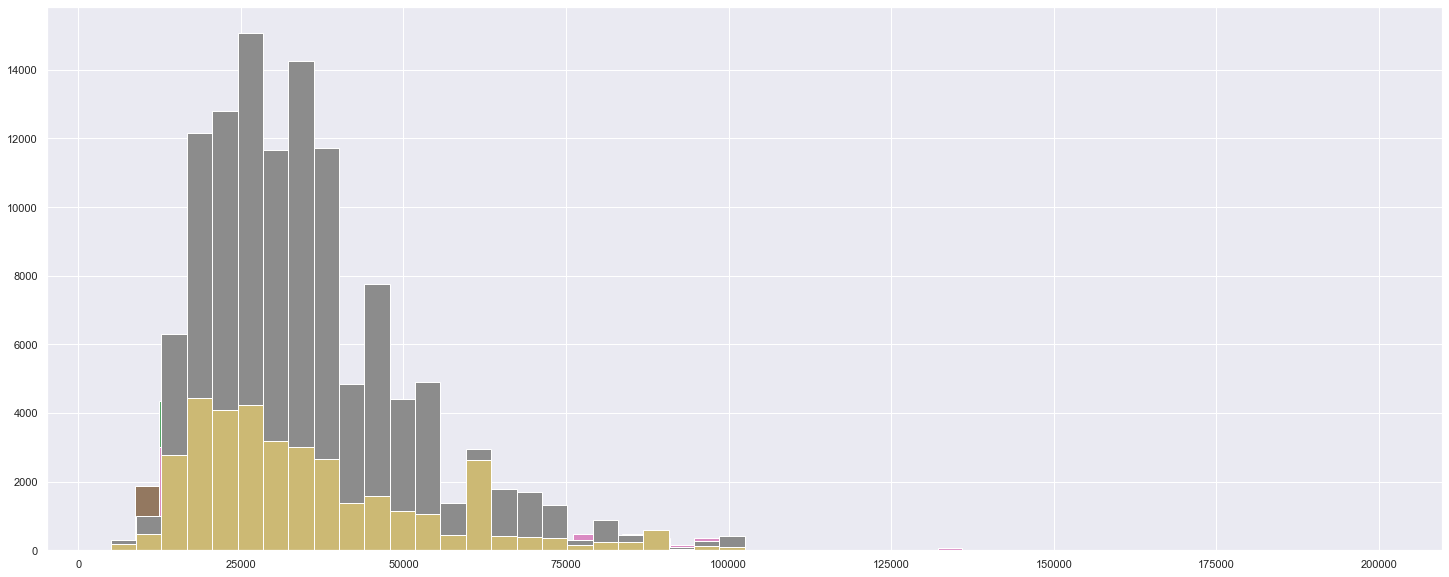

In [229]:
df.groupby(['ContractType','ContractTime'],dropna=False)['SalaryNormalized'].hist(bins=50)

In [230]:
df.groupby(['ContractType','ContractTime'],dropna=False)['SalaryNormalized'].median()

ContractType  ContractTime
full_time     contract        30720.0
              permanent       32500.0
              NaN             22000.0
part_time     contract        20160.0
              permanent       18453.0
              NaN             14400.0
NaN           contract        29760.0
              permanent       32500.0
              NaN             30000.0
Name: SalaryNormalized, dtype: float64

In [ ]:
#Company

In [7]:
CompanyMeanSal=df.groupby('Company').SalaryNormalized.agg(['mean','count'])

<AxesSubplot:xlabel='count', ylabel='mean'>

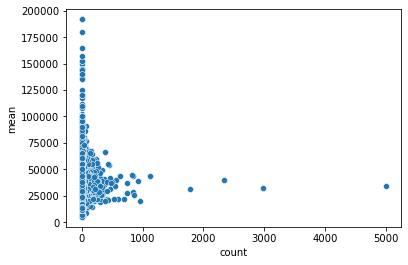

In [8]:
sns.scatterplot(x=CompanyMeanSal['count'], y=CompanyMeanSal['mean'])

In [ ]:
#Category

In [12]:
CategoryMeanSal=df.groupby('Category').SalaryNormalized.agg(['mean','count'])

<AxesSubplot:xlabel='count', ylabel='mean'>

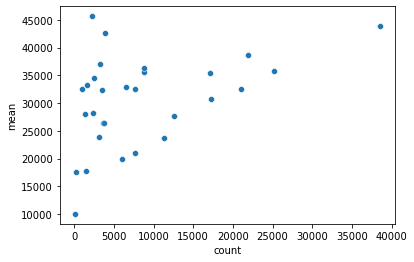

In [13]:
sns.scatterplot(x=CategoryMeanSal['count'], y=CategoryMeanSal['mean'])

In [130]:
sns.set(rc={'figure.figsize':(25,10)})

<AxesSubplot:xlabel='Category', ylabel='SalaryNormalized'>

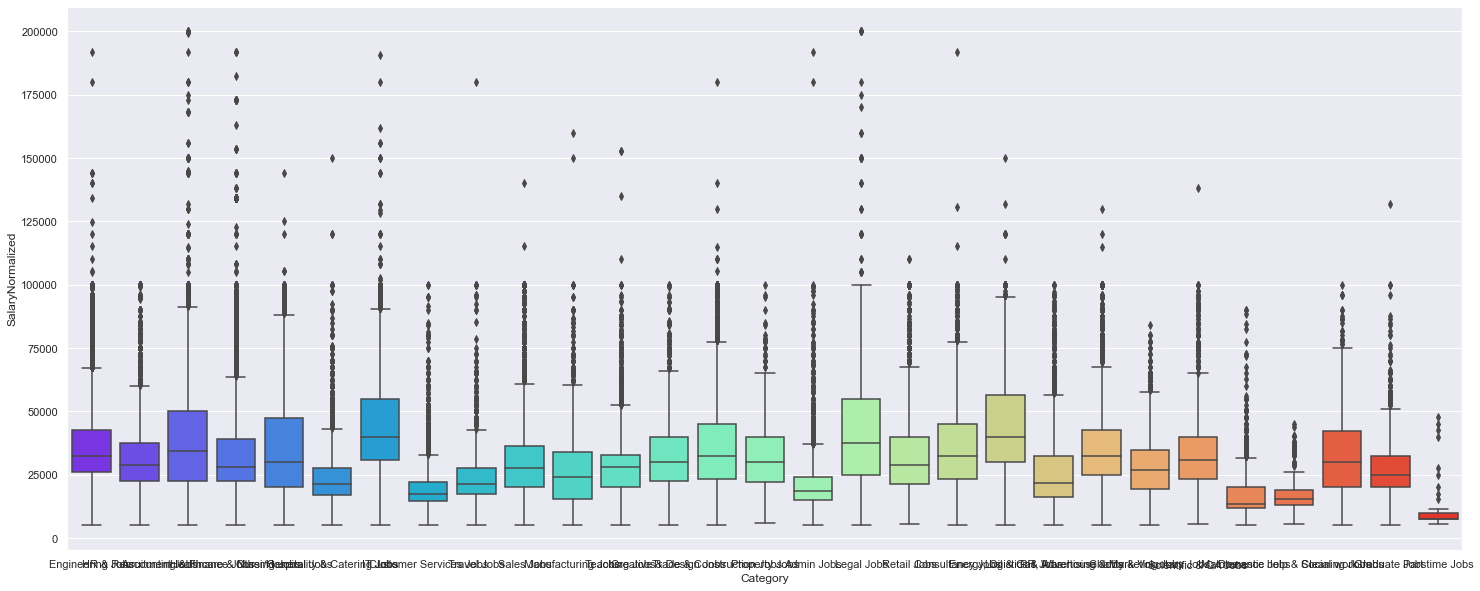

In [131]:
sns.boxplot(x='Category',y='SalaryNormalized',data=df,palette='rainbow')

In [ ]:
#Location

In [16]:
LocationMeanSal=df.groupby('LocationNormalized').SalaryNormalized.agg(['mean','count'])

<AxesSubplot:xlabel='count', ylabel='mean'>

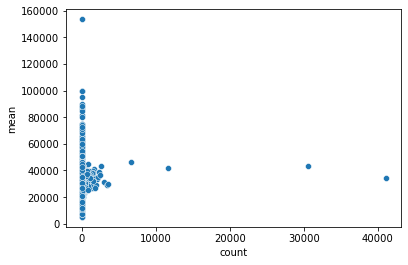

In [17]:
sns.scatterplot(x=LocationMeanSal['count'], y=LocationMeanSal['mean'])

# Preprocessing

In [ ]:
#dropping unrelevant data, 

In [339]:
full_df=df.Title.dropna()
full_df.info()

AttributeError: 'Series' object has no attribute 'info'

In [342]:
full_df=df[df.Title.isnull()!=True]
X=full_df.drop(['Id','FullDescription','LocationRaw','LocationNormalized','Company','SalaryRaw','SalaryNormalized','SourceName'],axis=1)
y=full_df['SalaryNormalized']
X.head()

,Title,ContractType,ContractTime,Category
0,Engineering Systems Analyst,NaN,permanent,Engineering Jobs
1,Stress Engineer Glasgow,NaN,permanent,Engineering Jobs
2,Modelling and simulation analyst,NaN,permanent,Engineering Jobs
3,Engineering Systems Analyst / Mathematical Mod...,NaN,permanent,Engineering Jobs
4,"Pioneer, Miser Engineering Systems Analyst",NaN,permanent,Engineering Jobs


In [343]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244767 entries, 0 to 244767
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         244767 non-null  object
 1   ContractType  65441 non-null   object
 2   ContractTime  180863 non-null  object
 3   Category      244767 non-null  object
dtypes: object(4)
memory usage: 9.3+ MB


In [ ]:
#Completing ContractType and ContractTime from FullDescription

In [107]:
#desc=df[df["ContractType"].isnull()].FullDescription
#desc_part=(["parttime" in word.lower().split() for word in df.FullDescription])
#desc_full=pd.DataFrame(["fulltime" in word.lower().split() for word in df.FullDescription])

In [ ]:
#Spliting tha data

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [135]:
#OneHot encoding to categorial cols

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [358]:
OH_cols=['ContractType','ContractTime','Category']
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OH_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[OH_cols]))

In [148]:
#FullDescription preprocessing

In [238]:
import string
import nltk
#nltk.download() #Download the necessary datasets
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
   
ps = PorterStemmer()

In [247]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Right now without Stemming
    #ps = PorterStemmer()
    #words = word_tokenize(''.join(nostopwords))
    #stemmed = [ps.stem(w) for w in words]    
    #answer = ' '.join(sorted(set(stemmed), key=stemmed.index))
    
    # Removing duplicate words
    return nostopwords

In [327]:
X_train['Title'][0]

'Engineering Systems Analyst'

In [328]:
sentence=(text_process(X_train['Title'][0]))
sentence

['Engineering', 'Systems', 'Analyst']

In [ ]:
#TFIDF

In [329]:
from sklearn.feature_extraction.text import CountVectorizer

In [345]:
def get_ngrams(text, ngram_from=2, ngram_to=2, n=None, max_features=20000):
    
    vec = CountVectorizer(ngram_range = (ngram_from, ngram_to), 
                          max_features = max_features, 
                          stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [346]:
bigrams = get_ngrams(X_train['Title'], ngram_from=2, ngram_to=2, n=15)
bigrams_df = pd.DataFrame(bigrams)
bigrams_df.columns=["Bigram", "Frequency"]
bigrams_df.head()

,Bigram,Frequency
0,sales executive,4421
1,account manager,3444
2,project manager,3283
3,business development,3147
4,development manager,2594


In [347]:
bow_transformer = CountVectorizer(ngram_range=(1,2),stop_words='english').fit(X_train['Title'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

140220


In [348]:
Titles_bow = bow_transformer.transform(X_train['Title'])

In [312]:
print('Shape of Sparse Matrix: ', Titles_bow.shape)
print('Amount of Non-Zero occurences: ', Titles_bow.nnz)

Shape of Sparse Matrix:  (195814, 140380)
Amount of Non-Zero occurences:  1283922


In [349]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(Titles_bow)

In [350]:
Title4=X_train['Title'][3]
bow4 = bow_transformer.transform([Title4])
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 124920)	0.2908723440411215
  (0, 124904)	0.20009316884572226
  (0, 82635)	0.3081960156708689
  (0, 79693)	0.4008065090054216
  (0, 79691)	0.3945993885965345
  (0, 43821)	0.417600627459668
  (0, 43622)	0.22086742002555967
  (0, 6507)	0.4641487295604016
  (0, 6037)	0.15940495475373412


In [351]:
Titles_train_tfidf = tfidf_transformer.transform(Titles_bow)
print(Titles_train_tfidf.shape)

(195813, 140220)


In [ ]:
#processing the validation data the same way

In [355]:
valid_bow_transformer = CountVectorizer(ngram_range=(1,2),stop_words='english').fit(X_valid['Title'])
Titles_valid_bow = bow_transformer.transform(X_valid['Title'])
Titles_valid_tfidf = tfidf_transformer.transform(Titles_valid_bow)
print(Titles_valid_tfidf.shape)

(48954, 140220)


In [306]:
#Joining all the processed Data

In [360]:
print(OH_cols_train.shape)
print(OH_cols_valid.shape)

(195813, 35)
(48954, 35)


In [364]:
type(Titles_valid_tfidf)

scipy.sparse.csr.csr_matrix

In [363]:
Titles_valid_tfidf_DF=pd.DataFrame(Titles_valid_tfidf)
Titles_valid_tfidf_DF.head(20)

,0
0,"(0, 114009)\t0.5992064873344695\n (0, 11366..."
1,"(0, 131906)\t0.6656662634665308\n (0, 42089..."
2,"(0, 125551)\t0.36699953783442313\n (0, 5361..."
3,"(0, 127458)\t0.43077949690134293\n (0, 2526..."
4,"(0, 107124)\t0.46441946983885546\n (0, 1071..."
5,"(0, 126347)\t0.3164268233487207\n (0, 12625..."
6,"(0, 88224)\t0.3372084656820993\n (0, 88206)..."
7,"(0, 99991)\t0.7559738951272521\n (0, 99919)..."
8,"(0, 127309)\t0.3080185950950038\n (0, 12724..."
9,"(0, 101042)\t0.3361100915603042\n (0, 70893..."


# Modeling

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [221]:
#Building a pipline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

Engineering Systems Analyst / Mathematical Modeller. Our client is a highly successful and respected Consultancy providing specialist software development MISER, PIONEER, Maths, Mathematical, Optimisation, Risk Analysis, Asset Management, Water Industry, Access, Excel, VBA, SQL, Systems . Engineering Systems Analyst / Mathematical Modeller. Salary  ****K****K negotiable Location Dorking, Surrey


  (0, 0)	33
  (0, 11)	18
  (0, 12)	1
  (0, 13)	10
  (0, 14)	5
  (0, 15)	21
  (0, 16)	1
  (0, 17)	4
  (0, 18)	4
  (0, 19)	17
  (0, 21)	4
  (0, 22)	12
  (0, 23)	8
  (0, 24)	10
  (0, 25)	10
  (0, 26)	6
  (0, 27)	1
  (0, 28)	12
  (0, 29)	23
  (0, 30)	16
  (0, 31)	4
  (0, 32)	3
  (0, 33)	2
  (0, 34)	1
  (0, 35)	4
(1, 48)
